<a href="https://colab.research.google.com/github/davetew/Modern-Aerospace-Propulsion/blob/main/Homework%20Solutions/Homework_1_Fundamental_Principles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework #1

## Problem 1 -- Ramjet performance versus Mach number
Please evaluate the performance of a simple ramjet as a function of its flight Mach number ($M_\infty$)-- nominally between ~0.3 and 3.0.  In this evaluation, please calculate and plot the dimensionless specific thrust ($\frac{T}{\dot{m}_{air}u_\infty}$) and the overall efficiency ($\frac{Tu_∞}{\dot{m}_{fuel}LHV_{fuel}}$) as a function of $M_\infty$.   

As discussed in lecture 2, ramjets have no mechanical compression system, and hence any static pressure rise from ambient occurs solely due to the deceleration of the incoming flow as it enters the engine.  For now, please assume that this occurs either 1) isentropically for $M_\infty \le 1$ or 2) via a normal shock for $M_\infty>1$.  (Please note that a normal shock inlet would be a very bad design for high Mach numbers, but it is simple 🙂.)

After we decelerate the flow to a low subsonic Mach number, add fuel (assume a stoichiometric amount of H2 for now), and assume that it fully reacts with the air before the combustion products enter the nozzle for expansion to ambient pressure.  In your model of the combustion process, please feel free to neglect compositional changes associated with the reaction and the associated changes in the specific heats, and simply add the appropriate amount of heat.  However, if you prefer, please feel free to use [Cantera](https://cantera.org/) (or the equivalent) to more accurately model the compositional changes and their subsequent impact on the nozzle performance.

For now, let's assume that the nozzle area profile varies in such a way with  $M_\infty$ that the combustion products are fully expanded (i.e., the nozzle exit pressure is always equal to the ambient pressure) as they leave the nozzle.  Please note that for this to occur over a range of Mach numbers, the geometry of the nozzle would change as $M_\infty$ changes.

Given our fully expanded nozzle assumption ($p_{exit}=p_\infty$), the ramjet thrust may be expressed as

$$T = \left(\dot{m}_{air}+\dot{m}_{fuel}\right) u_{exit} - \dot{m}_{air}u_\infty$$

where $\dot{m}_{air}, \dot{m}_{fuel}, u_\infty, u_{exit}$ are the inflow air mass flow rate, the fuel mass flow rate, the flight velocity, and the nozzle exit velocity, respectively.

By dividing the above expression for thrust by the "ram drag" (i.e., $\dot{m}_{air}u_∞$), an expression for the the dimensionless specific thrust results--

$$\frac{T}{\dot{m}_{air}u_\infty}=\left(1+\frac{\dot{m}_{fuel}}{\dot{m}_{air}}\right)\frac{u_{exit}}{u_\infty} - 1 \approx \frac{u_{exit}}{u_\infty} - 1$$

As a hint, the stoichiometric fuel to air mass ratio should be a constant, your job is to simply figure out how to calculate $\frac{u_{exit}}{u_\infty}$.

To complete this assignment, please share your annotated Jupyter notebook (or the equivalent) or a PDF of your analysis and output.

Please let me know if you have any questions!  We will also discuss progress/challenges next week during lecture.

In [ ]:
# Quietly install Cantera -- a non-standard Colab package
%pip install -q cantera

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.1/753.1 kB 44.1 MB/s eta 0:00:00


In [ ]:
# Import the required python packages
import numpy as np
import cantera as ct
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina' # Mac retina display resolution for plots

import pandas as pd

## Problem 1 - Solution

### Calculation of the stoichiometric fuel to air mass ratio
The stoichimetric air to fuel mass ratio for $H_2$/air combustion is calculated below.

The stoichiometric $H_2$/$O_2$ combustion reaction may be expressed as follows--

$$H_{2} + 0.5 O_{2} ⟶ H_2O$$

Hence, the $H_2$ to $O_2$ combustion mole ratio is

$$f_{molar}|_{H_2/O_2} = \frac{n_{H_2}}{n_{O_2}} = \frac{1}{0.5} = 2$$

The $H_2$ to $O_2$ mass ratio may then be found by converted the molar ratio to a mass ratio --

$$f_{mass}|_{H_2/O_2} = \frac{m_{H_2}}{m_{O_2}} = \frac{n_{H_2}\bar{m}_{H_2}}{n_{O_2}\bar{m}_{O_2}} = 2\frac{2}{32} = 0.125$$

Now, the $O_2$ in air is diluted by presence of $N_2$ and other gases.  Approximately, speaking let's assume that air consist of 21% $O_2$ and 79% $N_2$ by volume (i.e., on a molar basis).  Given this assumed composition, the molecular weight of air is

$$\bar{m}_{air} = 0.21\bar{m}_{O_2} + 0.79\bar{m}_{N_2} = 0.21(32) + 0.79(28)\approx29$$

The mass fraction of $O_2$ in air may then be calculated as follows

$$Y_{O_2} = \frac{0.21\bar{m}_{O_2}}{\bar{m}_{air}} = \frac{0.21(32)}{29} = 0.232$$

The fuel to air mass ratio for $H_2$ combustion may then be calculated by multiplying the $H_2$/$O_2$ fuel to air mass ratio by the $O_2$ mass fraction in air.

$$f \equiv f_{mass}|_{H_2/air} = f_{mass}|_{H_2/O_2}Y_{O_2} = 0.125*0.232 = 0.0289$$

### Dimensionless Specific Thrust

The dimensionless specific thrust is given by --

$$\frac{T}{\dot{m}_{air}u_\infty}=\left(1+f\right)\frac{u_{exit}}{u_\infty} - 1 \approx \frac{u_{exit}}{u_\infty} - 1 $$

#### Exit/Inlet Velocity Ratio
$\frac{u_{exit}}{u_\infty}$ may be expressed as

$$\frac{u_{exit}}{u_\infty} = \frac{M_{exit}\sqrt{\gamma_{exit} R_{exit}T_{exit}}}{M_{∞}\sqrt{\gamma_\infty R_\infty T_{\infty}}}$$

With the assumption that gas properties are constant (*i.e.*, $\gamma \equiv \gamma_{exit} = \gamma_\infty $, $R_{exit} = R_\infty$),

$$\frac{u_{exit}}{u_\infty} = \frac{M_{exit}}{M_{∞}}\sqrt{\frac{T_{exit}}{T_\infty}} = \frac{M_{exit}}{M_{∞}} \sqrt{\frac{T_{t_{exit}}\left(1+\frac{\gamma-1}{2}M_\infty^2\right)}{T_{t_\infty}\left(1+\frac{\gamma-1}{2}M_{exit}^2\right)}}$$

##### Combustor (& Cycle) Total Temperature Ratio ($\frac{T_{t_{exit}}}{T_{t_\infty}}$)
The exit to inlet total temperature ratio ($\frac{T_{t_{exit}}}{T_{t_\infty}}$) may be calculated from the energy balance across the combustor.  Assuming that the gas properties are constant, the combustor energy balance may be expressed as follows

$$\dot{m}_{air}c_{p_{air}}T_{t_\infty} + \dot{m}_{fuel}LHV_{fuel} = \left( \dot{m}_{air} + \dot{m}_{fuel}\right)c_{p_{air}}T_{t_{exit}}$$

Dividing through by $\dot{m}_{air}c_{p_{air}}T_{t_\infty}$,

$$1 + \frac{f\cdot LHV_{fuel}}{c_{p_{air}}T_{t_\infty}} = \left( 1 + f \right) \frac{T_{t_{exit}}}{T_{t_\infty}}$$

Solving for $\frac{T_{t_{exit}}}{T_{t_\infty}}$,

$$\frac{T_{t_{exit}}}{T_{t_\infty}} = \frac{1}{1+f}\left( 1 + \frac{f\cdot LHV_{fuel}}{c_{p_{air}}T_{t_\infty}}\right) \approx 1 + \frac{f\cdot LHV_{fuel}}{c_{p_{air}}T_{t_\infty}}$$

$T_{t_\infty}$ may be rewritten in the term that includes $LHV_{fuel}$ as a function of the constant ambient static temperature ($T_\infty$) and the specified Mach number ($M_\infty$).

$$\frac{T_{t_{exit}}}{T_{t_\infty}} =  1 + \frac{f\cdot LHV_{fuel}}{c_{p_{air}}T_\infty\left(1+\frac{\gamma-1}{2}M_\infty^2\right)}$$

##### Exit to Inlet Mach number ratio ($\frac{M_{exit}}{M_∞}$)
The exit Mach number may be calculated from the compressible flow relationship for the nozzle exit total to static pressure ratio:
$$\frac{P_{t_{exit}}}{p_{exit}} = \left(1 + \frac{\gamma-1}{2}M^2_{exit}\right)^{\frac{\gamma}{\gamma-1}}$$

However, with our isentropic inlet and constant pressure combustion assumption
$$P_{t_{exit}} = P_{t_{∞}}$$

Also, with our fully expanded nozzle assumption
$$p_{exit}=p_\infty$$

Hence,
$$\frac{P_{t_{exit}}}{p_{exit}} = \frac{P_{t_{∞}}}{p_{∞}} ⟹ M_{exit}=M_∞$$

##### The Bottom Line
Thus, the exit to inlet velocity ratio ($\frac{u_{exit}}{u_\infty}$) may be expressed soley as a function of the combustor total temperature ratio.
$$\frac{u_{exit}}{u_\infty} = \sqrt{\frac{T_{t_{exit}}}{T_{t_∞}}} = \sqrt{ 1 + \frac{f\cdot LHV_{fuel}}{c_{p_{air}}T_{t_\infty}}}$$





In [ ]:
class IdealRamjet:
  """Class to facilitate the analysis of ideal ramjet performance"""

  def __init__(self, Mach=1.0, gamma=1.4, R_J_kgK = 287.05,
               T_amb_K=219, f=0.0289, LHV_MJ_kg=120) -> None:
    """Initialize an instance of IdealRamjet"""
    self.Mach, self.ga, self.R_J_kgK, self.T_amb_K, self.f, self.LHV_MJ_kg = Mach, gamma, R_J_kgK, T_amb_K, f, LHV_MJ_kg

  @property
  def cp(self):
    """Calculate the specific heat at constant pressure"""
    return self.R_J_kgK*self.ga/(self.ga-1)

  @property
  def theta(self):
    """Calculate adiabatic the total to static temperature ratio"""
    return 1 + (self.ga - 1)/2 * self.Mach**2

  @property
  def Tt_exit(self):
    """Calculate the exit to inlet total temperature ratio"""
    return (1 + self.f * self.LHV_MJ_kg*1e6 / (self.cp * self.T_amb_K * self.theta))

  @property
  def u_exit(self):
    """Calculate the exit to inlet velocity ratio"""
    return np.sqrt(self.Tt_exit)

  @property
  def specific_thrust(self):
    """Calculate the dimensionless specific thrust (i.e., thrust/ram drag)"""
    return self.u_exit - 1

  @property
  def efficiency(self):
    """Calculate the efficiency"""
    return self.specific_thrust * self.Mach**2 / self.f * self.ga * self.R_J_kgK * self.T_amb_K / self.LHV_MJ_kg / 1e6


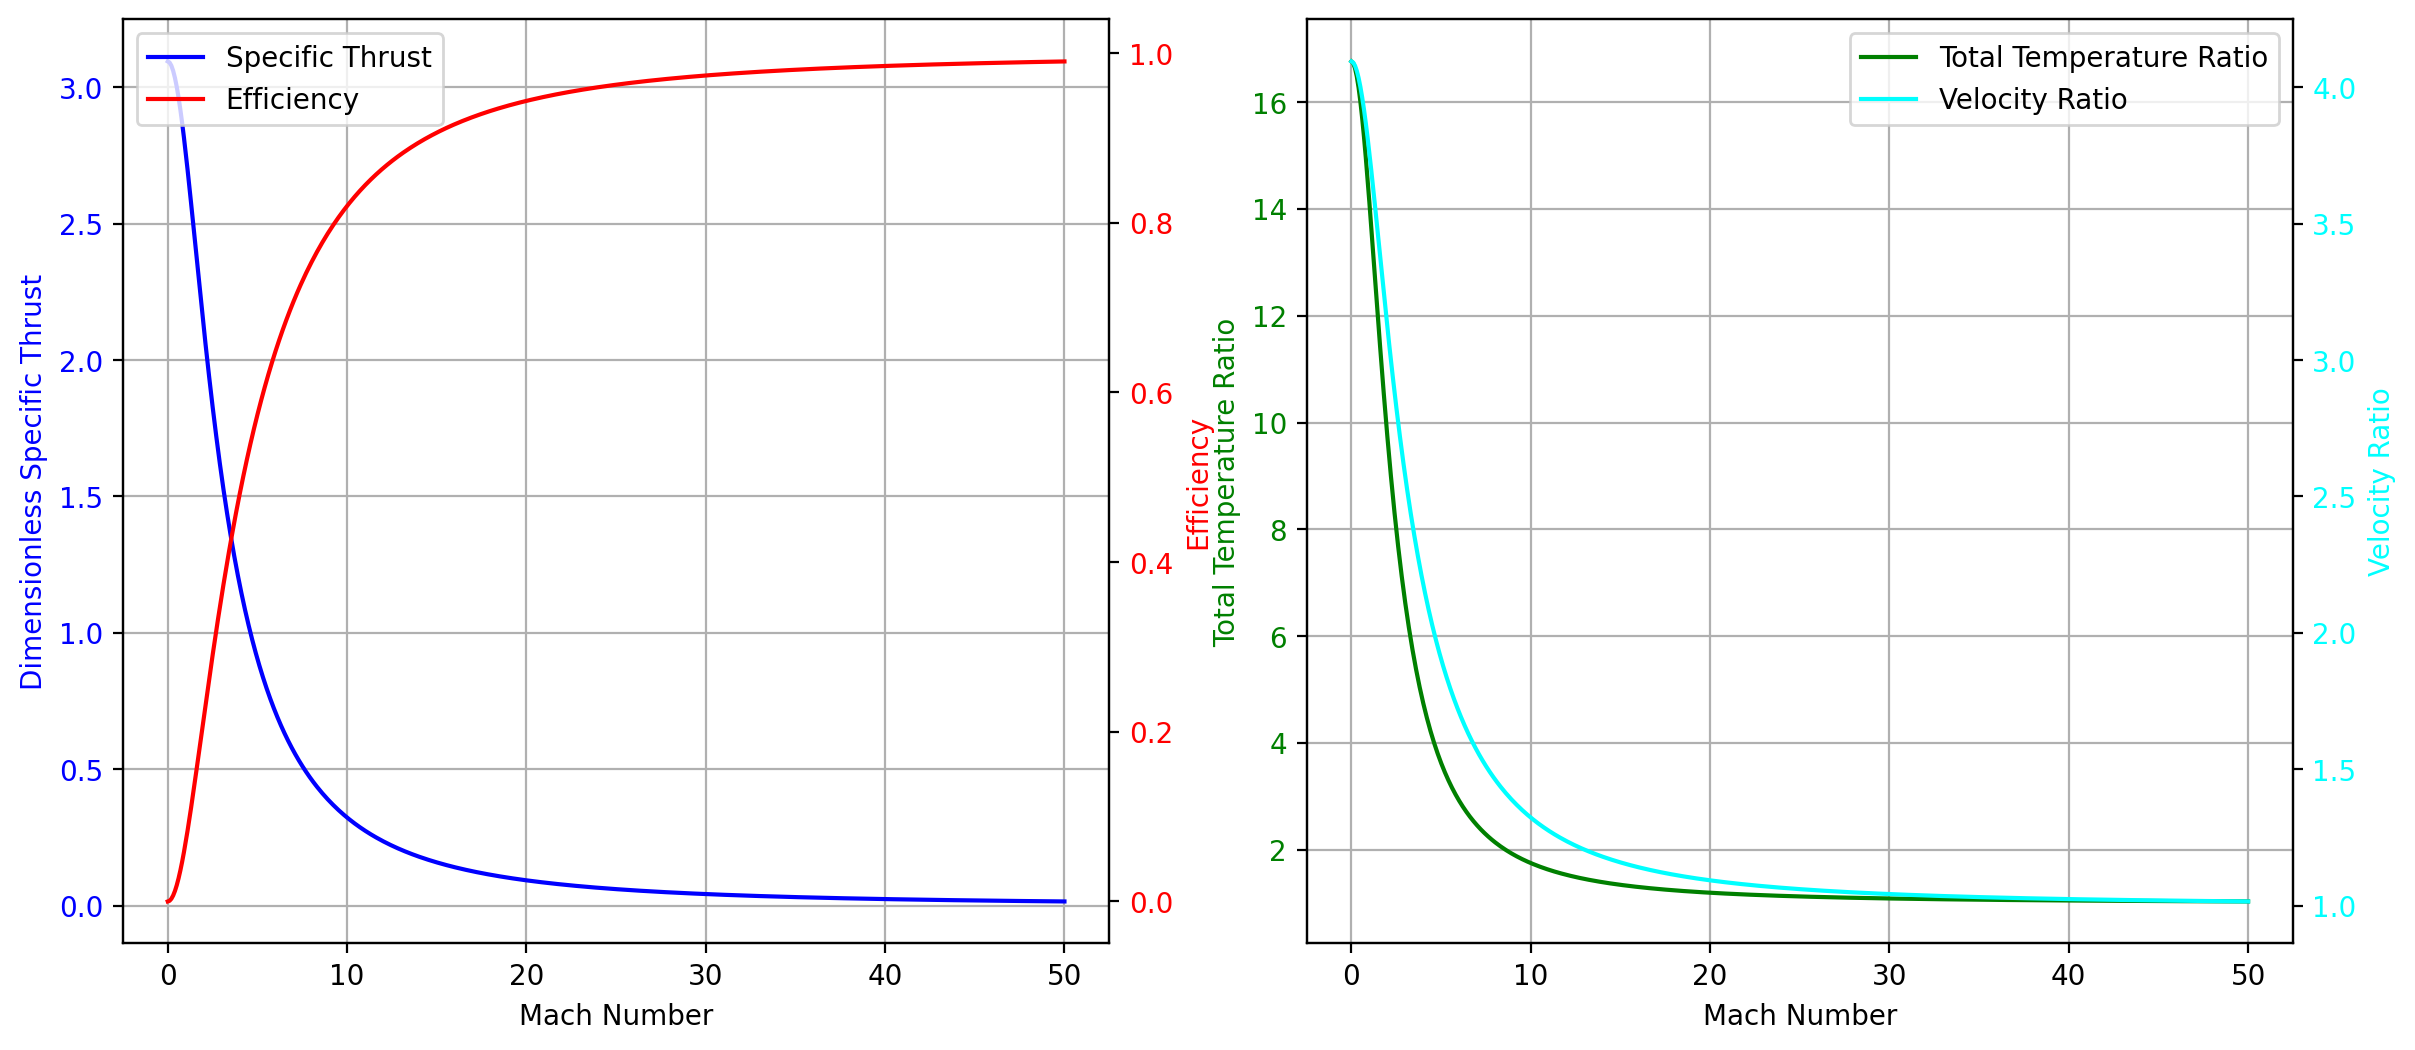

In [ ]:
# Plot the dimensionless specific thrust and efficiency vs flight Mach number
Mach = np.linspace(1e-6, 50.0, 500)
df = pd.DataFrame(columns=['Mach', 'Specific Thrust', 'Efficiency'])

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].plot(Mach, IdealRamjet(Mach=Mach).specific_thrust, color="blue", label='Specific Thrust')
ax[0].set_xlabel('Mach Number')
ax[0].set_ylabel('Dimensionless Specific Thrust', color="blue")
ax[0].tick_params(axis='y', labelcolor="blue")
ax[0].grid()

ax2 = ax[0].twinx()
ax2.plot(Mach, IdealRamjet(Mach=Mach).efficiency, color="red", label='Efficiency')
ax2.set_ylabel('Efficiency', color="red")
ax2.tick_params(axis='y', labelcolor="red")

# Combine the two legends
lines, labels = ax[0].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Plot the velocity and temperature ratios versus Mach number
ax[1].plot(Mach, IdealRamjet(Mach=Mach).Tt_exit, color="green", label='Total Temperature Ratio')
ax[1].set_xlabel('Mach Number')
ax[1].set_ylabel('Total Temperature Ratio', color="green")
ax[1].tick_params(axis='y', labelcolor="green")
ax[1].grid()
ax3 = ax[1].twinx()
ax3.plot(Mach, IdealRamjet(Mach=Mach).u_exit, color="cyan", label='Velocity Ratio')
ax3.set_ylabel('Velocity Ratio', color="cyan")
ax3.tick_params(axis='y', labelcolor="cyan")

lines, labels = ax[1].get_legend_handles_labels()
lines2, labels2 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2, labels + labels2, loc='best')
plt.show()